In [58]:
import numpy as np
import scipy.sparse 
from scipy.sparse import spdiags
import matplotlib.pyplot as plt
import pdb
import numpy.matlib
%matplotlib inline

## Create Laplacian Matrix using "repmat"

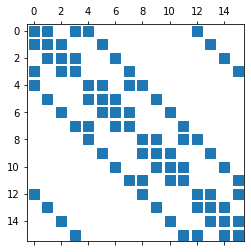

In [59]:
m = 4 # N value in x and y directions
n = m*m # total size of matrix

e1 = np.ones(n) # vector of ones
Low1 = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
Low2 = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2
                                    # Low2 is NOT on the second lower diagonal,
                                    # it is just the next lower diagonal we see
                                    # in the matrix.
#pdb.set_trace()
Up1 = np.roll(Low1, 1) # Shift the array for spdiags
Up2 = np.roll(Low2, m-1) # Shift the other array

A = scipy.sparse.spdiags([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1],
                         [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)], n, n)

plt.spy(A) # view the matrix structure
plt.show()

In [60]:
n=8
e = np.arange(1,9)
print(e)
Bin =np.array([e, e, e, e, e])
d =np.arange(-2,3)
print(d)
M = spdiags(Bin, d, n,n)
M

[1 2 3 4 5 6 7 8]
[-2 -1  0  1  2]


<8x8 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements (5 diagonals) in DIAgonal format>

In [61]:
M.todense()

matrix([[1, 2, 3, 0, 0, 0, 0, 0],
        [1, 2, 3, 4, 0, 0, 0, 0],
        [1, 2, 3, 4, 5, 0, 0, 0],
        [0, 2, 3, 4, 5, 6, 0, 0],
        [0, 0, 3, 4, 5, 6, 7, 0],
        [0, 0, 0, 4, 5, 6, 7, 8],
        [0, 0, 0, 0, 5, 6, 7, 8],
        [0, 0, 0, 0, 0, 6, 7, 8]])

In [62]:
np.matlib.repmat(np.array([[1],[2],[3]]),5,2)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3]])

In [63]:
# need to go 5 steps in x and y direction
m = 5
n = m*m
e0 = np.zeros((n))
e1 =np.ones((n))#main diagonal and diagonal of ones

e2 = e1.copy()
e4 = e0.copy()

for j in range(m):
    e2[m*j-1] = 0
    e4[m*j-1] = 1
    
e3 = np.zeros((n))
e3[1:n+1] = e2[0:n-1]
e3[0] =e2[n-1]

e5 = np.zeros((n))
e5[1:n+1] = e4[0:n-1]
e5[0] =e4[n-1]

Bin = np.array([e1, e1, e5, e2, -4*e1, e3, e4, e1, e1])
d = np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m , (n-m)])

matA = spdiags(Bin, d, n, n)

In [64]:
e1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
e2

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0.])

In [66]:
e3

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [67]:
e4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1.])

In [68]:
e5

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])

In [69]:
matA.toarray()[0:9,0:9]

array([[-4.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., -4.]])

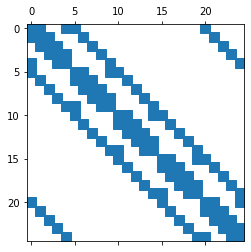

In [70]:
plt.spy(matA)

In [71]:
m = 5
n = 25
e1 =np.ones((n))
l1 =np.concatenate((np.ones(m-1), np.array([0])))
Low1 = np.matlib.repmat(l1,1,m).reshape(n)

l2 =np.concatenate((np.array([1]), np.zeros(m-1)))
Low2 = np.matlib.repmat(l2,1,m).reshape(n)

Up1 = np.roll(Low1,1)

Up2 = np.roll(Low2, m-1)

Bin = np.array((e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1))

d = np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m , (n-m)])

matA1 = spdiags(Bin, d, n, n, format ='csc')

In [99]:
e1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
Low1

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0.])

In [73]:
Up1

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [74]:
Low2

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])

In [75]:
Up2

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1.])

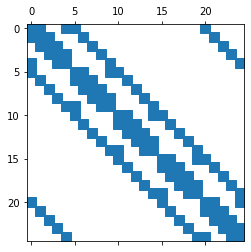

In [76]:
plt.spy(matA1)

In [77]:
from scipy.sparse.linalg import spsolve
b = np.ones((n))
ans = spsolve(matA1, b)
ans

array([-5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15, -5.97822959e+15, -5.97822959e+15, -5.97822959e+15,
       -5.97822959e+15])

## Solving PDEs

### 1. Solving the Heat Equation

In [78]:
#define our initial condition
f = lambda x: np.exp(-x**2) #gaussian initial condition
L = 5
term =5 #(final time is 5 as well)
x = np.arange(-L,L,0.1)
N = len(x)

In [79]:
# Create the matrix A =d^2/dx^2 using diag

D = -2*np.ones((N))
Up = np.ones((N-1))
Down = np.ones((N-1))

A = np.diag(D) + np.diag(Up,1) + np.diag(Down,-1)

#Periodic Boundary conditions
A[0,-1] = 1
A[-1,0] = 1

#u_tt = 100*u_xx
A = 100*A

#Defining the initial condition
y0 = f(x)

In [80]:
#function for heat equation
def heatPDE(t,x,A):
    u_t = A@x #time derivative
    return u_t

In [81]:
from scipy.integrate import solve_ivp
import time

In [82]:
tic =time.time()
sol =solve_ivp(lambda t,x: heatPDE(t,x,A), [0,term]#pass the time span
               , y0) #pass the initial condition
toc = time.time()
print(toc-tic)

0.2911338806152344


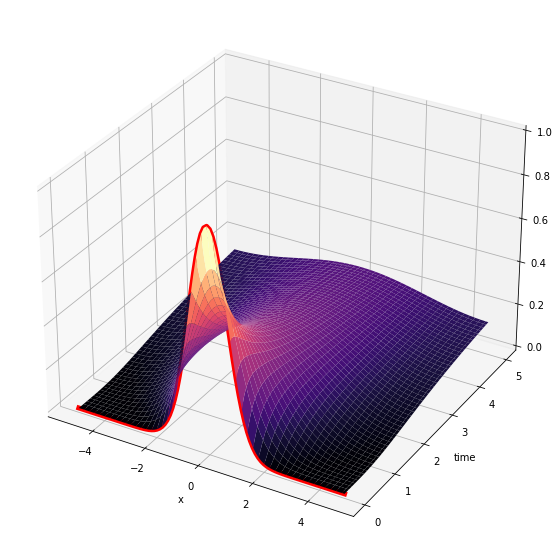

In [83]:
X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw = {"projection":"3d"}, figsize =(25,10))
surf = ax.plot_surface(X,T,sol.y.T, cmap='magma')
ax.plot3D(x,0*x,f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

### 2. Solve the wave equation

In [84]:
def wavePDE(t,x,A):
    #x = [u; u_t]
    N = int(len(x)/2) #length of our computational domain
    u_t = np.array([x[N:],100*A@x[0:N] ]).reshape(len(x)) #time derivative
    
    return u_t

In [92]:
f = lambda x: np.exp(-(x**2)) #first initial condition
g = lambda x: np.zeros((len(x))) #second initial condition

L = 15
term = 10
x = np.arange(-L,L,0.1)
N = len(x)

In [93]:
#creating sparse matrix A
e = np.ones((N))
Bin = np.array([e, e, -2*e, e, e])
d = np.array([-N+1, -1, 0, 1, N-1])
A1 = spdiags(Bin, d, N, N)
A1

<300x300 sparse matrix of type '<class 'numpy.float64'>'
	with 900 stored elements (5 diagonals) in DIAgonal format>

In [94]:
#A1 = A.toarray()
A1

<300x300 sparse matrix of type '<class 'numpy.float64'>'
	with 900 stored elements (5 diagonals) in DIAgonal format>

In [95]:
# setting up the initial condition

y0 = np.array([f(x),g(x)]).reshape(len(x)*2)


In [96]:
tic =time.time()
sol =solve_ivp(lambda t,x: wavePDE(t,x,A1), [0,term], y0)
toc = time.time()
print(toc-tic)

0.17783904075622559


In [97]:
y_sol = sol.y[0:N].T #solution for u

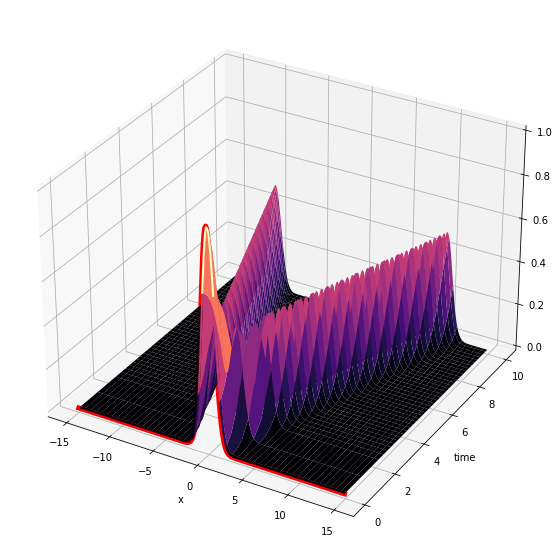

In [98]:
X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw = {"projection":"3d"}, figsize =(25,10))
surf = ax.plot_surface(X,T,y_sol, cmap='magma')
ax.plot3D(x,0*x,f(x),'-r',linewidth=5)

#ax.view_init(30, 120)
plt.xlabel('x')
plt.ylabel('time')
plt.show()